In [1]:
import pickle
import pandas as pd
from tqdm import tqdm
from datetime import datetime, date
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob
import numpy as np

In [2]:
swap_files = glob.glob('/scratch/Debbie_Miori/crypto/swapData/*')
id_pools = [file.split('swapData/')[1].split('_')[0] for file in swap_files]
print(len(id_pools))

282


In [3]:
LP_files = glob.glob('/home/miori/Desktop/crypto/LPdata/*')
LP_files[0]

'/home/miori/Desktop/crypto/LPdata/0x2e8daf55f212be91d3fa882cceab193a08fddeb2_LPdata.pkl'

In [4]:
pools_info = pd.read_pickle('/home/miori/Desktop/crypto/TxnCount_1000_pools_desc_151122.pkl')
pools_info = pools_info.set_index('id')
pools_info = pools_info.loc[id_pools, :]
pools_info

,feeTier,sqrtPrice,token0Price,token1Price,volumeToken0,volumeToken1,volumeUSD,txCount,liquidity,totalValueLockedToken0,...,token0_name,token0_decimals,token0_poolCount,token0_totalValueLockedUSD,token1_id,token1_symbol,token1_name,token1_decimals,token1_poolCount,token1_totalValueLockedUSD
id,,,,,,,,,,,,,,,,,,,,,
0xcce08de16df4e906040d21183996dd99df04d674,3000,3.641937e+35,4.732541e-02,2.113030e+01,1.318110e+07,1.894081e+07,1.318110e+07,5902.0,4.728899e+14,2.018400e+04,...,USD Coin,6,0,8.996516e+08,0xc4f6e93aeddc11dc22268488465babcaf09399ac,HI,hi Dollar,18,0,0.000000e+00
0x19f83460e387f1b01f94b85c2532ebc15b0b712e,3000,6.733077e+35,1.384625e-02,7.222174e+01,9.769868e+07,3.091136e+09,9.769973e+07,13232.0,3.602751e+18,2.941628e+05,...,Tether USD,6,0,2.089063e+08,0xfa14fa6958401314851a17d6c5360ca29f74b57b,SAITO,SAITO,18,0,7.834723e+05
0x381fe4eb128db1621647ca00965da3f9e09f4fac,10000,1.206046e+24,4.315502e+09,2.317228e-10,1.737134e+14,4.317512e+04,1.600290e+08,67202.0,2.266407e+25,2.001250e+12,...,Dogelon,18,0,6.307067e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
0x7a5ae802895d5f90b6edbafc870fd348fba2a3d2,3000,3.800024e+32,4.346969e+04,2.300454e-05,7.860132e+08,2.179181e+05,4.979495e+08,17197.0,0.000000e+00,1.188121e+06,...,UST (Wormhole),6,0,0.000000e+00,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
0xede8dd046586d22625ae7ff2708f879ef7bdb8cf,3000,2.964408e+27,7.143041e+02,1.399964e-03,2.241112e+07,6.447242e+04,1.727779e+08,23113.0,3.885695e+21,1.047226e+05,...,Synthetix Network Token,18,0,1.843754e+06,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xb82d251b7e92832dccb7f3c6f03ae20f2d7ee597,10000,9.431738e+23,7.056279e+09,1.417178e-10,1.040803e+14,1.236686e+05,4.801338e+08,73301.0,1.650236e+23,5.740595e+11,...,SOS,18,0,1.121381e+05,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,Wrapped Ether,18,0,7.696633e+08
0xb06e7ed37cfa8f0f2888355dd1913e45412798c5,3000,3.102498e+35,6.521331e-02,1.533429e+01,1.356396e+08,2.065560e+08,1.356582e+08,11836.0,9.145443e+17,2.507361e+05,...,USD Coin,6,0,8.996516e+08,0xc944e90c64b2c07662a292be6244bdf05cda44a7,GRT,Graph Token,18,0,1.187108e+05
0x0e2c4be9f3408e5b1ff631576d946eb8c224b5ed,3000,1.100008e+31,5.187612e-05,1.927669e+04,2.148859e+04,1.011990e+08,6.325100e+07,14656.0,1.043414e+22,4.259151e+01,...,Wrapped Ether,18,0,7.696633e+08,0xc944e90c64b2c07662a292be6244bdf05cda44a7,GRT,Graph Token,18,0,1.187108e+05


In [5]:
True & True, True & False, False & True, False & False

(True, False, False, False)

In [6]:
"""
    Extract relevant data for a pool
"""

def development_pool(pool_id, start=datetime(2022, 1, 1), end=datetime(2022, 7, 1), plot=False):
    
    # upload the specific data wanted
    path_lp = '/home/miori/Desktop/crypto/LPdata/'+pool_id+'_LPdata.pkl'
    lp = pd.read_pickle(path_lp)
    
    path_swap = '/scratch/Debbie_Miori/crypto/swapData/'+pool_id+'_swapdata.pkl'
    swap = pd.read_pickle(path_swap)
    
    #print('LP time range', min(list(lp.timestamp)), max(list(lp.timestamp)))
    #print('LT time range', min(list(swap.timestamp)), max(list(swap.timestamp)))

    """
        Check if pool had enough txns at the beginning of the range considered
    """
    
    # cumulative sum of both swap transactions and liquidity provision operations
    swaps_date = swap.loc[:, ['timestamp']]
    swaps_date = swaps_date.groupby(swaps_date.timestamp.dt.date).count()
    swaps_date.columns = ['n_transactions']

    liq_date = lp.loc[:, ['timestamp']]
    liq_date = liq_date.groupby(liq_date.timestamp.dt.date).count()
    liq_date.columns = ['n_transactions']

    tot_txns_date = pd.concat([swaps_date, liq_date])
    tot_txns_date = tot_txns_date.reset_index()
    tot_txns_date = tot_txns_date.groupby('timestamp').sum()

    cum_txn_date = dict(zip(list(tot_txns_date.index), np.cumsum(list(tot_txns_date.n_transactions))))
    
    df = pd.DataFrame.from_dict(cum_txn_date, orient='index')
    df.columns = ['txns']
    df = df.asfreq('D', method='pad')

    continue_ = True
    try:
        #print(df.loc[datetime(2022, 1, 1), 'txns'])
        jan = df.loc[start, 'txns'] >= 1e3
        #print(jan)
        if jan == False:
            continue_ = False
    except:
        continue_ = False
        
    
    """
        Check if pool had enough TVL both at the beginning and end of the range considered
    """
    
    if continue_ == True:
        # cumulative sum to have a proxy for TVL in time
        tvl_date = lp.loc[:, ['timestamp', 'amountUSD']]
        tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
        cum_tvl_date = dict(zip(list(tvl_date.index), np.cumsum(list(tvl_date.amountUSD))))

        df = pd.DataFrame.from_dict(cum_tvl_date, orient='index')
        df.columns = ['proxyTVL']
        df = df.asfreq('D', method='pad')
        
        """
            Plot
        """
        # if you want to plot to have a look
        if plot == True:

            plt.figure(figsize=(8, 4))
            plt.plot(lp.timestamp, np.cumsum(list(lp.amountUSD)))
            plt.grid()
            plt.title('TVL as cumsum amount USD minted/burnt')
            plt.show()

            plt.figure(figsize=(8, 4))
            plt.plot(cum_txn_date.keys(), cum_txn_date.values())
            plt.grid()
            plt.title('Cumsum txns')
            plt.show()

        try:
            jan = df.loc[start, 'proxyTVL'] >= 1e6
            jul = df.loc[end, 'proxyTVL'] >= 1e6
            if jan & jul:
                return pool_id
              
        except:
            return np.nan
    else:
        return np.nan

In [8]:
# Jan-Jun
saved_poolsJanJune = []
for pool_id in tqdm(id_pools):
    saved_poolsJanJune.append(development_pool(pool_id, 
                                        start=datetime(2022, 1, 1),
                                        end=datetime(2022, 7, 1),
                                        plot=False))
saved_poolsJanJune = [p for p in saved_poolsJanJune if type(p)==str]

####################################################################################
# Jan-March
saved_poolsJanMarch = []
for pool_id in tqdm(id_pools):
    saved_poolsJanMarch.append(development_pool(pool_id, 
                                        start=datetime(2022, 1, 1),
                                        end=datetime(2022, 4, 1),
                                        plot=False))
saved_poolsJanMarch = [p for p in saved_poolsJanMarch if type(p)==str]

# Apr-Jun
saved_poolsAprJune = []
for pool_id in tqdm(id_pools):
    saved_poolsAprJune.append(development_pool(pool_id, 
                                        start=datetime(2022, 4, 1),
                                        end=datetime(2022, 7, 1),
                                        plot=False))
saved_poolsAprJune = [p for p in saved_poolsAprJune if type(p)==str]

####################################################################################
# Jan-Feb
saved_poolsJanFeb = []
for pool_id in tqdm(id_pools):
    saved_poolsJanFeb.append(development_pool(pool_id, 
                                        start=datetime(2022, 1, 1),
                                        end=datetime(2022, 3, 1),
                                        plot=False))
saved_poolsJanFeb = [p for p in saved_poolsJanFeb if type(p)==str]

# March-Apr
saved_poolsMarApr = []
for pool_id in tqdm(id_pools):
    saved_poolsMarApr.append(development_pool(pool_id, 
                                        start=datetime(2022, 3, 1),
                                        end=datetime(2022, 5, 1),
                                        plot=False))
saved_poolsMarApr = [p for p in saved_poolsMarApr if type(p)==str]

# May-June
saved_poolsMayJune = []
for pool_id in tqdm(id_pools):
    saved_poolsMayJune.append(development_pool(pool_id, 
                                        start=datetime(2022, 5, 1),
                                        end=datetime(2022, 7, 1),
                                        plot=False))
saved_poolsMayJune = [p for p in saved_poolsMayJune if type(p)==str]

  0%|                                                   | 0/282 [00:00<?, ?it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
  1%|▎                                          | 2/282 [00:00<00:15, 17.53it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 11%|████▊                                     | 32/282 [00:11<04:49,  1.16s/it]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 24%|█████████▉                                | 67/282 [00:15<00:20, 10.27it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 26%|██████████▋                               | 72/282 [00:15<00:15, 13.19it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 36%|██████████████▊                          | 102/282 [00:19<00:25,  7.18it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 47%|███████████████████▏                     | 132/282 [00:22<00:19,  7.56it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 48%|███████████████████▍                     | 134/282 [00:22<00:17,  8.56it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 57%|███████████████████████▎                 | 160/282 [00:30<00:14,  8.25it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 57%|███████████████████████▌                 | 162/282 [00:30<00:12,  9.64it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 59%|███████████████████████▉                 | 165/282 [00:30<00:10, 11.15it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of nume

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 67%|███████████████████████████▌             | 190/282 [00:35<00:13,  6.70it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 68%|████████████████████████████             | 193/282 [00:36<00:09,  9.12it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 78%|████████████████████████████████▏        | 221/282 [00:40<00:15,  4.01it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 90%|████████████████████████████████████▉    | 254/282 [00:46<00:04,  6.38it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 91%|█████████████████████████████████████▎   | 257/282 [00:46<00:02,  8.49it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 12%|█████▏                                    | 35/282 [00:11<03:03,  1.34it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 13%|█████▌                                    | 37/282 [00:11<02:29,  1.63it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 25%|██████████▍                               | 70/282 [00:14<00:17, 11.84it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 26%|██████████▊                               | 73/282 [00:14<00:14, 14.50it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 37%|███████████████                          | 104/282 [00:18<00:20,  8.68it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 38%|███████████████▋                         | 108/282 [00:18<00:13, 12.69it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 48%|███████████████████▍                     | 134/282 [00:20<00:17,  8.69it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 49%|███████████████████▉                     | 137/282 [00:21<00:13, 10.63it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 59%|████████████████████████▏                | 166/282 [00:29<00:11,  9.83it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 60%|████████████████████████▍                | 168/282 [00:30<00:17,  6.57it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 69%|████████████████████████████▎            | 195/282 [00:35<00:10,  8.60it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 79%|████████████████████████████████▍        | 223/282 [00:41<00:24,  2.45it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 80%|████████████████████████████████▊        | 226/282 [00:41<00:16,  3.42it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 93%|█████████████████████████████████████▉   | 261/282 [00:47<00:05,  4.11it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

  2%|▊                                          | 5/282 [00:00<00:24, 11.37it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
  2%|█                                          | 7/282 [00:00<00:23, 11.78it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 12%|█████                                     | 34/282 [00:11<03:26,  1.20it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 13%|█████▎                                    | 36/282 [00:11<02:32,  1.61it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 23%|█████████▌                                | 64/282 [00:14<00:25,  8.49it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 24%|█████████▉                                | 67/282 [00:14<00:19, 10.83it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 33%|█████████████▋                            | 92/282 [00:16<00:18, 10.44it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 33%|██████████████                            | 94/282 [00:16<00:17, 11.00it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 42%|█████████████████▏                       | 118/282 [00:19<00:13, 12.50it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 43%|█████████████████▍                       | 120/282 [00:19<00:13, 11.73it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 51%|████████████████████▉                    | 144/282 [00:27<00:55,  2.50it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 52%|█████████████████████▏                   | 146/282 [00:27<00:42,  3.19it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 61%|████████████████████████▊                | 171/282 [00:30<00:13,  8.21it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 61%|█████████████████████████▏               | 173/282 [00:30<00:11,  9.62it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 70%|████████████████████████████▊            | 198/282 [00:35<00:12,  6.60it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 71%|█████████████████████████████            | 200/282 [00:36<00:11,  7.37it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 79%|████████████████████████████████▍        | 223/282 [00:41<00:23,  2.47it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 88%|████████████████████████████████████     | 248/282 [00:44<00:09,  3.62it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 89%|████████████████████████████████████▎    | 250/282 [00:45<00:08,  3.97it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 97%|███████████████████████████████████████▊ | 274/282 [00:50<00:02,  3.83it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

  8%|███▎                                      | 22/282 [00:02<00:23, 11.12it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
  9%|███▌                                      | 24/282 [00:02<00:20, 12.29it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 20%|████████▎                                 | 56/282 [00:13<00:50,  4.46it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 33%|█████████████▋                            | 92/282 [00:16<00:18, 10.54it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 43%|█████████████████▍                       | 120/282 [00:19<00:13, 11.79it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 53%|█████████████████████▊                   | 150/282 [00:28<00:42,  3.09it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 63%|██████████████████████████               | 179/282 [00:33<00:47,  2.15it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 64%|██████████████████████████▏              | 180/282 [00:34<00:42,  2.39it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 74%|██████████████████████████████▍          | 209/282 [00:36<00:06, 11.56it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 75%|██████████████████████████████▊          | 212/282 [00:37<00:04, 14.42it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 86%|███████████████████████████████████▏     | 242/282 [00:42<00:03, 12.80it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 87%|███████████████████████████████████▌     | 245/282 [00:44<00:09,  4.09it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 97%|███████████████████████████████████████▊ | 274/282 [00:50<00:02,  3.95it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

  8%|███▎                                      | 22/282 [00:02<00:23, 11.24it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
  9%|███▌                                      | 24/282 [00:02<00:20, 12.38it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 19%|███████▉                                  | 53/282 [00:12<00:27,  8.28it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 30%|████████████▋                             | 85/282 [00:16<00:30,  6.55it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 40%|████████████████▌                        | 114/282 [00:18<00:15, 10.66it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 49%|███████████████████▉                     | 137/282 [00:21<00:13, 10.88it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 49%|████████████████████▏                    | 139/282 [00:26<01:38,  1.45it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 59%|████████████████████████▎                | 167/282 [00:29<00:09, 11.72it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 60%|████████████████████████▌                | 169/282 [00:30<00:16,  7.01it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 69%|████████████████████████████▏            | 194/282 [00:34<00:09,  9.19it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 70%|████████████████████████████▍            | 196/282 [00:35<00:15,  5.64it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 78%|████████████████████████████████▏        | 221/282 [00:38<00:14,  4.17it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 79%|████████████████████████████████▍        | 223/282 [00:41<00:24,  2.41it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 90%|████████████████████████████████████▉    | 254/282 [00:45<00:04,  6.46it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 91%|█████████████████████████████████████▎   | 257/282 [00:45<00:02,  8.58it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 99%|████████████████████████████████████████▌| 279/282 [00:50<00:00,  5.93it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
100%|████████████████████████████████████████▊| 281/282 [00:50<00:00,  6.60it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

  8%|███▎                                      | 22/282 [00:02<00:23, 11.25it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
  9%|███▌                                      | 24/282 [00:02<00:21, 12.24it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 17%|███████                                   | 47/282 [00:11<00:45,  5.19it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 26%|███████████                               | 74/282 [00:14<00:15, 13.63it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 35%|██████████████▌                          | 100/282 [00:17<00:13, 13.80it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 45%|██████████████████▎                      | 126/282 [00:20<00:20,  7.47it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 53%|█████████████████████▊                   | 150/282 [00:28<00:45,  2.87it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 61%|█████████████████████████▏               | 173/282 [00:30<00:11,  9.57it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 62%|█████████████████████████▍               | 175/282 [00:31<00:18,  5.76it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 70%|████████████████████████████▊            | 198/282 [00:35<00:12,  6.72it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 71%|█████████████████████████████            | 200/282 [00:35<00:10,  7.57it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 79%|████████████████████████████████▍        | 223/282 [00:40<00:23,  2.46it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whic

 87%|███████████████████████████████████▊     | 246/282 [00:43<00:08,  4.25it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 88%|████████████████████████████████████     | 248/282 [00:44<00:09,  3.66it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

 95%|███████████████████████████████████████  | 269/282 [00:48<00:02,  4.50it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
 96%|███████████████████████████████████████▍ | 271/282 [00:48<00:02,  5.01it/s]/tmp/ipykernel_1540003/517408074.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_onl

In [11]:
print(pd.__version__)
print(pickle.format_version)

1.5.1
4.0


In [12]:
print(len(id_pools))
print(len(saved_poolsJanJune))
print(len(saved_poolsJanMarch), len(saved_poolsAprJune))
print(len(saved_poolsJanFeb), len(saved_poolsMarApr), len(saved_poolsMayJune))

282
113
126 148
131 146 155


In [14]:
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanJune.pkl', 'wb') as f:
    pickle.dump(saved_poolsJanJune, f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanMarch.pkl', 'wb') as f:
    pickle.dump(saved_poolsJanMarch, f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsAprJune.pkl', 'wb') as f:
    pickle.dump(saved_poolsAprJune, f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanFeb.pkl', 'wb') as f:
    pickle.dump(saved_poolsJanFeb, f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsMarApr.pkl', 'wb') as f:
    pickle.dump(saved_poolsMarApr, f)
    
with open('/home/miori/Desktop/crypto/cases/saved_poolsMayJune.pkl', 'wb') as f:
    pickle.dump(saved_poolsMayJune, f)

In [7]:
with open('/home/miori/Desktop/crypto/cases/saved_poolsJanJune.pkl', 'rb') as f:
    saved_poolsJanJune = pickle.load(f)

In [8]:
all_ = saved_poolsJanJune + saved_poolsJanMarch + saved_poolsAprJune + \
saved_poolsJanFeb + saved_poolsMarApr + saved_poolsMayJune
all_ = np.unique(all_)
len(all_)

NameError: name 'saved_poolsJanMarch' is not defined

In [9]:
info = pd.read_pickle('/home/miori/Desktop/crypto/TxnCount_1000_pools_desc_151122.pkl')
info_ = info.set_index('id')

info_ = info_.loc[all_, ['feeTier']].reset_index()
info_ = info_.groupby('feeTier').count()
info_

NameError: name 'all_' is not defined

### Brief further analyses

In [10]:
info = pd.read_pickle('/home/miori/Desktop/crypto/TxnCount_1000_pools_desc_151122.pkl')

sub_info = {}
for a in saved_poolsJanJune:
    temp = info[info.id==a]
    sub_info[a] = temp.token0_symbol.values[0] + '-' + temp.token1_symbol.values[0] + '/' + temp.feeTier.values[0]

In [11]:
sub_info

{'0xcce08de16df4e906040d21183996dd99df04d674': 'USDC-HI/3000',
 '0x381fe4eb128db1621647ca00965da3f9e09f4fac': 'ELON-WETH/10000',
 '0xede8dd046586d22625ae7ff2708f879ef7bdb8cf': 'SNX-WETH/3000',
 '0xa6cc3c2531fdaa6ae1a3ca84c2855806728693e8': 'LINK-WETH/3000',
 '0x77edfa75eab19b772466a4affcf5555b7532badf': 'WETH-OS/10000',
 '0x4bec87cb126de6c1f8b410e32d1f4ae472fdd83b': 'WETH-EURT/3000',
 '0x7379e81228514a1d2a6cf7559203998e20598346': 'WETH-sETH2/3000',
 '0xdd005650ac6805457f4fa6ee1816813ce815e914': 'USDC-NCR/500',
 '0x6f48eca74b38d2936b02ab603ff4e36a6c0e3a77': 'DAI-USDT/500',
 '0xc63b0708e2f7e69cb8a1df0e1389a98c35a76d52': 'FRAX-USDC/500',
 '0x3470447f3cecffac709d3e783a307790b0208d60': 'UNI-USDT/3000',
 '0xd83d78108dd0d1dffff11ea3f99871671a52488b': 'PAX-WETH/3000',
 '0x4f2f3bdf115539a78a30769eb42489bd0f9d47da': 'USDC-DHT/3000',
 '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640': 'USDC-WETH/500',
 '0xdf9ab3c649005ebfdf682d2302ca1f673e0d37a2': 'WETH-BTRFLY/10000',
 '0x00cef0386ed94d738c8f8a74e8bfd

In [12]:
"""
    Briefly consider case A
"""

path_lp = '/home/miori/Desktop/crypto/LPdata/'

tvl = {}

for address in saved_poolsJanJune:
    name = sub_info[address]
    with open(path_lp+address+'_LPdata.pkl', 'rb') as f:
        lp = pickle.load(f)
    tvl_date = lp.loc[:, ['timestamp', 'amountUSD']]
    tvl_date = tvl_date[tvl_date.timestamp < datetime(2022, 7, 1, 0, 0, 0)]
    tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
    cum_tvl_date = dict(zip(list(tvl_date.index), np.cumsum(list(tvl_date.amountUSD))))
    
    df = pd.DataFrame.from_dict(cum_tvl_date, orient='index')
    df.columns = ['proxyTVL']
    df = df.asfreq('D', method='pad')
    
    tvl[name] = df

/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.ti

/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.ti

/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.ti

/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.timestamp.dt.date).sum()
/tmp/ipykernel_3099484/3068773225.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tvl_date = tvl_date.groupby(tvl_date.ti

In [13]:
max_tvl_pool, val = '', 0
dict_tvl = {}
for k in tvl.keys():
    curr_val = tvl[k].iloc[-1, 0]
    if curr_val > val:
        val = curr_val
        max_tvl_pool = k
    dict_tvl[k] = curr_val
print(max_tvl_pool, val)

DAI-USDC/100 716101020.5720369


In [15]:
with open('/home/miori/Desktop/crypto/tvl.pkl', 'wb') as f:
    pickle.dump(tvl, f)

<Figure size 720x216 with 0 Axes>

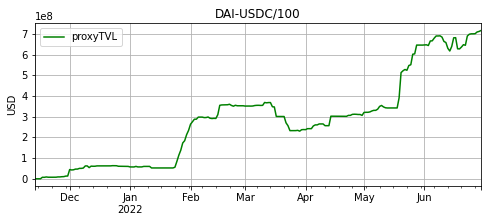

In [14]:
k = max_tvl_pool
plt.figure(figsize=(10, 3))
tvl[k].plot(color='green', figsize=(8, 3))
plt.title(k)
plt.grid()
plt.ylabel('USD')
plt.show()

In [15]:
df_tvl = pd.DataFrame.from_dict(dict_tvl, orient='index')
df_tvl.columns = ['proxyTVL']
df_tvl = df_tvl.sort_values(by='proxyTVL', ascending=False)
df_tvl = df_tvl.iloc[:10, :]
df_tvl

,proxyTVL
DAI-USDC/100,7.161010e+08
USDC-WETH/3000,4.963286e+08
DAI-USDC/500,4.783029e+08
WBTC-WETH/3000,4.155411e+08
USDC-WETH/500,3.940153e+08
WETH-USDT/3000,2.219706e+08
WBTC-WETH/500,1.843502e+08
WBTC-USDC/3000,1.422456e+08
USDC-USDT/100,1.367008e+08
FRAX-USDC/500,1.316843e+08


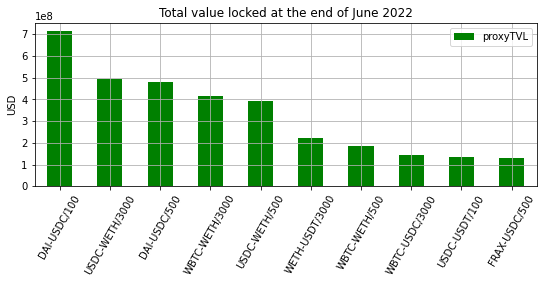

In [16]:
ax = df_tvl.plot.bar(y='proxyTVL', rot=60, figsize=(9,3), color='green')
plt.grid()
plt.title('Total value locked at the end of June 2022')
plt.ylabel('USD')
plt.show()

In [17]:
"""
    Now transaction count
"""

path_swap = '/scratch/Debbie_Miori/crypto/swapData/'

txns = {}

for address in tqdm(saved_poolsJanJune):
    name = sub_info[address]
    with open(path_swap+address+'_swapdata.pkl', 'rb') as f:
        swap = pickle.load(f)
    swap_date = swap.loc[:, ['timestamp', 'id']]
    swap_date = swap_date[swap_date.timestamp < datetime(2022, 7, 1, 0, 0, 0)]
    swap_date = swap_date[swap_date.timestamp > datetime(2021, 12, 31, 0, 0, 0)]
    if len(swap_date) > 0:
        df = swap_date.groupby(swap_date.timestamp.dt.date).count()
        df = df.iloc[:, [1]]
        df.columns = ['dailyTxns']
        df = df.asfreq('D', method='pad')

        txns[name] = df

100%|█████████████████████████████████████████| 113/113 [01:13<00:00,  1.53it/s]


In [18]:
max_txn_pool, val = '', 0
dict_txn = {}
for k in txns.keys():
    curr_val = sum(list(txns[k].iloc[:, 0]))
    if curr_val > val:
        val = curr_val
        max_txn_pool = k
    dict_txn[k] = curr_val
        
print(max_txn_pool, val)

USDC-WETH/500 1126969


<Figure size 720x216 with 0 Axes>

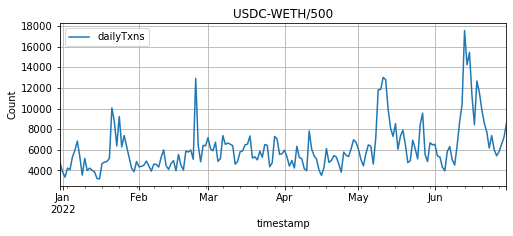

In [19]:
k = max_txn_pool
plt.figure(figsize=(10, 3))
txns[k].plot(figsize=(8, 3))
plt.title(k)
plt.grid()
plt.ylabel('Count')
plt.show()

In [20]:
df_txn = pd.DataFrame.from_dict(dict_txn, orient='index')
df_txn.columns = ['tot_txns']
df_txn = df_txn.sort_values(by='tot_txns', ascending=False)
df_txn = df_txn.iloc[:10, :]
df_txn

,tot_txns
USDC-WETH/500,1126969
WETH-USDT/500,437130
DAI-WETH/500,148914
WBTC-WETH/500,129826
USDC-USDT/100,111102
HEX-WETH/3000,99054
USDC-WETH/3000,96283
WETH-USDT/3000,74316
HEX-USDC/3000,70497
DAI-USDC/100,62520


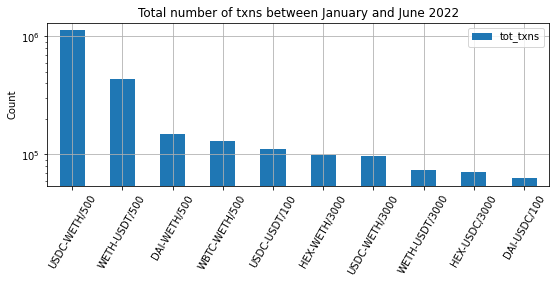

In [21]:
ax = df_txn.plot.bar(y='tot_txns', rot=60, figsize=(9,3))
plt.grid()
plt.yscale('log')
plt.title('Total number of txns between January and June 2022')
plt.ylabel('Count')
plt.show()

<Figure size 720x216 with 0 Axes>

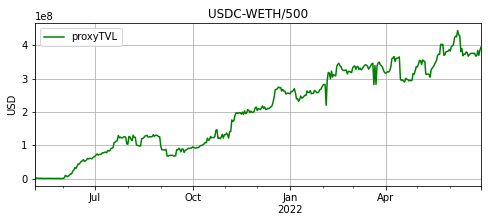

In [22]:
k = 'USDC-WETH/500'
plt.figure(figsize=(10, 3))
tvl[k].plot(color='green', figsize=(8, 3))
plt.title(k)
plt.grid()
plt.ylabel('USD')
plt.show()

<Figure size 720x216 with 0 Axes>

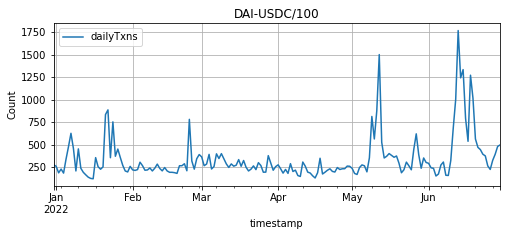

In [23]:
k = 'DAI-USDC/100'
plt.figure(figsize=(10, 3))
txns[k].plot(figsize=(8, 3))
plt.title(k)
plt.grid()
plt.ylabel('Count')
plt.show()